# Data preprocessing


In [1]:
import csv
import numpy as np

There are some missing index values in the dataset which is represented as 0.
I think there are two ways to solve this (my priority is only use real data cause this is a medical problem):

* We may skip all the data that contains missing values
* Or, we may replace these missing values with the mean of all patients

In [9]:
with open('/content/diabetes-dataset.csv', 'r') as f:
  reader = csv.reader(f, delimiter = ',')
  next(reader)
  labels_skip = []
  values_skip = []
  values_mean = []
  labels_mean = []

  reader_list = list(reader)
  np_reader = np.array(reader_list, dtype = 'float32')
  np_reader_mean = np.sum(np_reader, axis = 0,  keepdims = False) / len(reader_list)

  L = np_reader_mean.shape[0]


  for row in reader_list:
    values_mean.append([float(x) for x in row[:-1]])
    labels_mean.append(int(row[-1]))
  i = 0
  for row in reader_list:
    if not str(0) in row[1:-1]:
      values_skip.append([float(x) for x in row[:-1]])
      labels_skip.append(int(row[-1]))

    elif str(0) in row[1:-1]:
      for j in range(1, L-1):
        if str(row[j]) == str(0):
          print(f'{i}_{j} = True')
          values_mean[i][j] = float(np_reader_mean[j])

    i += 1
values_mean = np.array(values_mean)
values_skip = np.array(values_skip)
labels_mean = np.array(labels_mean)
labels_skip = np.array(labels_skip)


0_4 = True
2_2 = True
2_3 = True
2_4 = True
6_4 = True
7_3 = True
7_4 = True
9_4 = True
10_4 = True
12_2 = True
12_3 = True
12_4 = True
12_5 = True
13_3 = True
13_4 = True
14_3 = True
14_4 = True
19_4 = True
20_1 = True
20_4 = True
22_4 = True
23_3 = True
23_4 = True
27_3 = True
27_4 = True
28_4 = True
30_3 = True
30_4 = True
31_3 = True
31_4 = True
34_4 = True
36_3 = True
36_4 = True
37_4 = True
38_4 = True
41_3 = True
41_4 = True
42_4 = True
44_3 = True
44_4 = True
45_4 = True
46_3 = True
46_4 = True
47_4 = True
48_4 = True
49_2 = True
49_3 = True
49_4 = True
49_5 = True
55_4 = True
58_3 = True
58_4 = True
60_2 = True
60_3 = True
60_4 = True
60_5 = True
61_3 = True
61_4 = True
62_3 = True
62_4 = True
64_3 = True
64_4 = True
65_4 = True
66_4 = True
67_3 = True
67_4 = True
72_3 = True
72_4 = True
74_4 = True
75_1 = True
75_4 = True
76_3 = True
76_4 = True
77_4 = True
78_2 = True
78_3 = True
78_4 = True
79_4 = True
80_4 = True
81_2 = True
81_3 = True
81_4 = True
81_5 = True
83_4 = True


In [10]:
print(values_mean.shape)
print(values_skip.shape)
print(labels_mean.shape)
print(labels_skip.shape)

print((values_mean[:5]))

(2000, 8)
(1035, 8)
(2000,)
(1035,)
[[2.00000000e+00 1.38000000e+02 6.20000000e+01 3.50000000e+01
  8.02539978e+01 3.36000000e+01 1.27000000e-01 4.70000000e+01]
 [0.00000000e+00 8.40000000e+01 8.20000000e+01 3.10000000e+01
  1.25000000e+02 3.82000000e+01 2.33000000e-01 2.30000000e+01]
 [0.00000000e+00 1.45000000e+02 6.91455002e+01 2.09349995e+01
  8.02539978e+01 4.42000000e+01 6.30000000e-01 3.10000000e+01]
 [0.00000000e+00 1.35000000e+02 6.80000000e+01 4.20000000e+01
  2.50000000e+02 4.23000000e+01 3.65000000e-01 2.40000000e+01]
 [1.00000000e+00 1.39000000e+02 6.20000000e+01 4.10000000e+01
  4.80000000e+02 4.07000000e+01 5.36000000e-01 2.10000000e+01]]


In [11]:
import tensorflow as tf

In [16]:
import matplotlib.pyplot as plt

In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape = (8,), activation  =  'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(),
                metrics = 'accuracy')

There is like a local minima so the loss is not changing so much in some first epochs

I have to train it for longer time but the result is always overfitting after about 300 epochs


# Training with mean method

In [24]:

history_1 = model.fit(values_mean, labels_mean, epochs = 200, validation_split = 0.8)

Epoch 1/200
13/13 [==============================] - 2s 37ms/step - loss: 2.0477 - accuracy: 0.5338 - val_loss: 1.2802 - val_accuracy: 0.3392
Epoch 2/200
13/13 [==============================] - 0s 17ms/step - loss: 1.0442 - accuracy: 0.5263 - val_loss: 0.6766 - val_accuracy: 0.6477
Epoch 3/200
13/13 [==============================] - 0s 18ms/step - loss: 0.8011 - accuracy: 0.6015 - val_loss: 0.6674 - val_accuracy: 0.6608
Epoch 4/200
13/13 [==============================] - 0s 13ms/step - loss: 0.7535 - accuracy: 0.5639 - val_loss: 0.6704 - val_accuracy: 0.6608
Epoch 5/200
13/13 [==============================] - 0s 19ms/step - loss: 0.7367 - accuracy: 0.5764 - val_loss: 0.6718 - val_accuracy: 0.6608
Epoch 6/200
13/13 [==============================] - 0s 13ms/step - loss: 0.7538 - accuracy: 0.5764 - val_loss: 0.6645 - val_accuracy: 0.6608
Epoch 7/200
13/13 [==============================] - 0s 12ms/step - loss: 0.7068 - accuracy: 0.5990 - val_loss: 0.6635 - val_accuracy: 0.6608
Epoch 

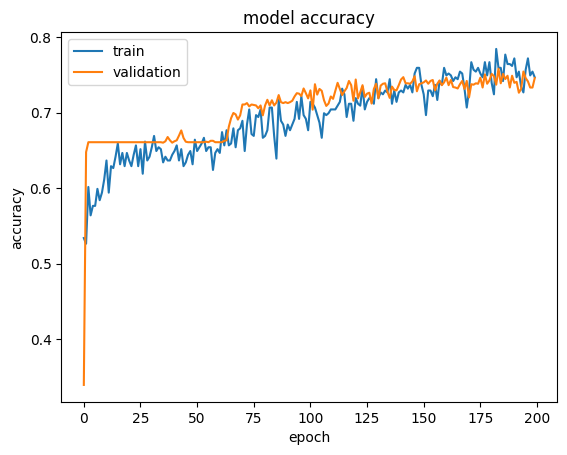

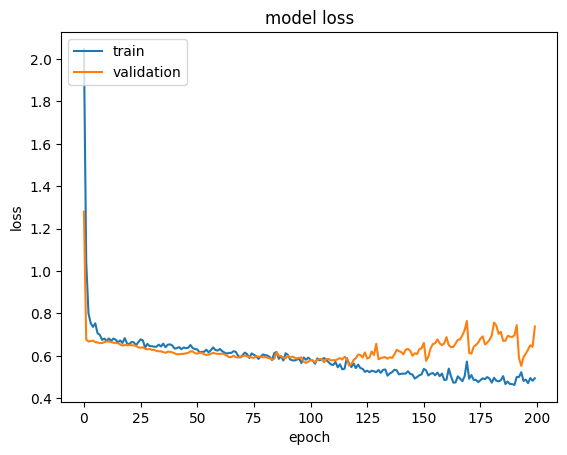

In [25]:
plt.plot(history_1.history['accuracy'])
plt.plot(history_1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_1.history['loss'])
plt.plot(history_1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()


# Trained with skipping method

Model takes more time to get through the local minima point

In [31]:
history_2 = model.fit(values_skip, labels_skip, epochs = 400, validation_split = 0.8)

Epoch 1/400
7/7 [==============================] - 2s 52ms/step - loss: 8.9303 - accuracy: 0.4078 - val_loss: 2.8196 - val_accuracy: 0.6767
Epoch 2/400
7/7 [==============================] - 0s 18ms/step - loss: 3.0513 - accuracy: 0.5631 - val_loss: 2.2405 - val_accuracy: 0.6767
Epoch 3/400
7/7 [==============================] - 0s 19ms/step - loss: 2.1604 - accuracy: 0.6068 - val_loss: 1.0739 - val_accuracy: 0.6767
Epoch 4/400
7/7 [==============================] - 0s 19ms/step - loss: 1.7435 - accuracy: 0.5485 - val_loss: 0.6891 - val_accuracy: 0.6767
Epoch 5/400
7/7 [==============================] - 0s 19ms/step - loss: 1.5231 - accuracy: 0.4951 - val_loss: 0.7284 - val_accuracy: 0.3317
Epoch 6/400
7/7 [==============================] - 0s 19ms/step - loss: 1.3172 - accuracy: 0.5049 - val_loss: 0.7380 - val_accuracy: 0.3245
Epoch 7/400
7/7 [==============================] - 0s 16ms/step - loss: 1.0757 - accuracy: 0.5291 - val_loss: 0.7456 - val_accuracy: 0.3233
Epoch 8/400
7/7 [===

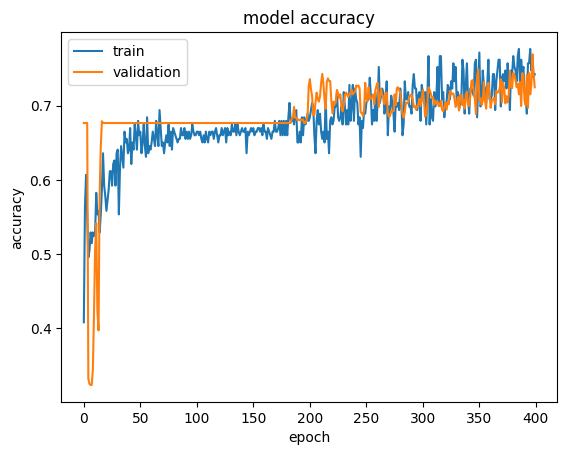

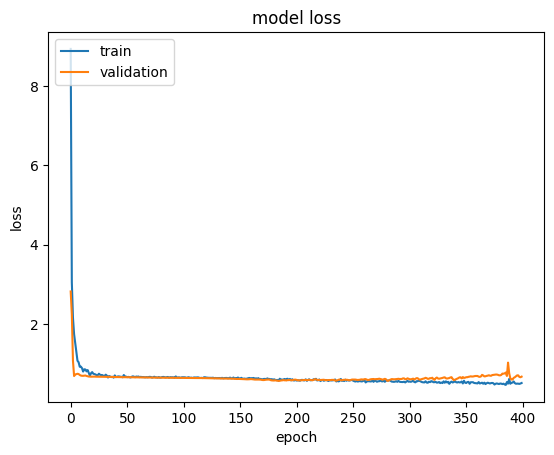

In [32]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# I then decided to use the skip method preprocessing and tuned the learning rate
After trying many times using lr scheduler callbacks i think learning rate should be in range 1e-4 and 1e-3

In [45]:
model_tuned = tf.keras.models.Sequential([
    tf.keras.layers.Dense(16, input_shape = (8,), activation  =  'relu'),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(32, activation = 'relu'),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

model_tuned.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate =5e-4),
                metrics = 'accuracy')

In [46]:
history_3 = model_tuned.fit(values_skip, labels_skip, epochs = 600, validation_split = 0.8)

Epoch 1/600
7/7 [==============================] - 2s 53ms/step - loss: 4.1942 - accuracy: 0.3447 - val_loss: 0.6837 - val_accuracy: 0.6393
Epoch 2/600
7/7 [==============================] - 0s 19ms/step - loss: 1.6641 - accuracy: 0.5000 - val_loss: 0.8530 - val_accuracy: 0.6767
Epoch 3/600
7/7 [==============================] - 0s 17ms/step - loss: 1.3782 - accuracy: 0.5874 - val_loss: 0.8902 - val_accuracy: 0.6767
Epoch 4/600
7/7 [==============================] - 0s 16ms/step - loss: 1.3178 - accuracy: 0.5437 - val_loss: 0.7923 - val_accuracy: 0.6767
Epoch 5/600
7/7 [==============================] - 0s 16ms/step - loss: 1.2964 - accuracy: 0.5971 - val_loss: 0.7305 - val_accuracy: 0.6767
Epoch 6/600
7/7 [==============================] - 0s 18ms/step - loss: 1.1390 - accuracy: 0.5583 - val_loss: 0.6955 - val_accuracy: 0.6767
Epoch 7/600
7/7 [==============================] - 0s 15ms/step - loss: 1.0947 - accuracy: 0.5583 - val_loss: 0.6893 - val_accuracy: 0.6767
Epoch 8/600
7/7 [===

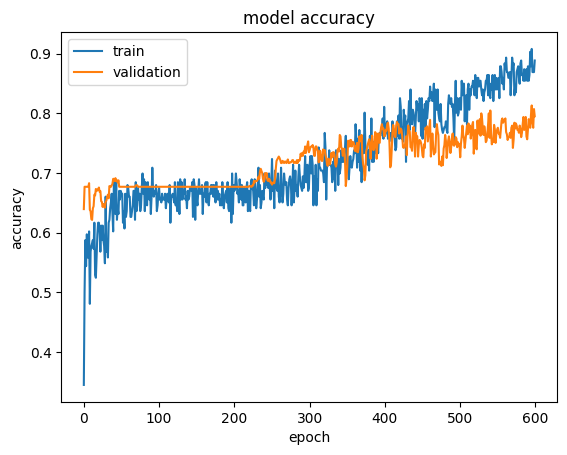

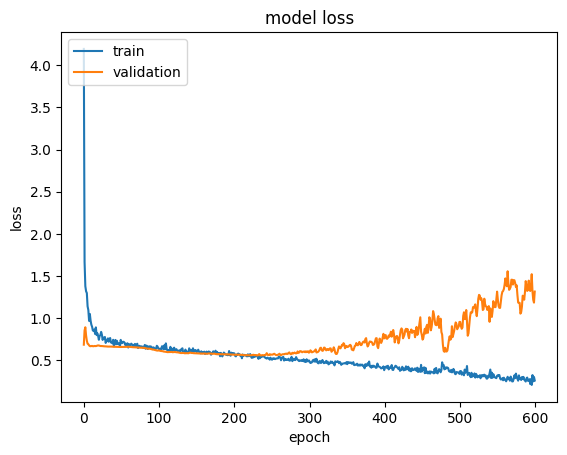

In [48]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
# "Loss"
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## The best accuracy for training and validation without overfitting is about 0.76